In [1]:
import os
import sys
import argparse
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


#         for run_name in ["bf", "gd"]:
        for run_name in ["gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name:
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads/result/workload_1/gd/5_5
10.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 14.pkl
[success]
16.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 16.pkl
[success]
18.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 18.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 2.pkl
[success]
20.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 20.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/gd/5_5 24.pkl
[success]
26.pkl
[load output] ../../wo

gd_5_5


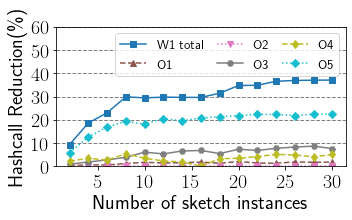

<Figure size 432x288 with 0 Axes>

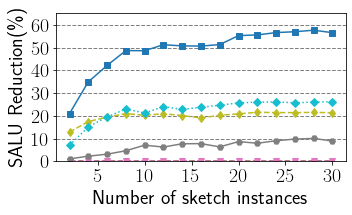

<Figure size 432x288 with 0 Axes>

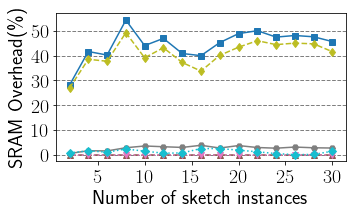

<Figure size 432x288 with 0 Axes>

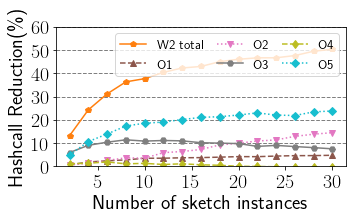

<Figure size 432x288 with 0 Axes>

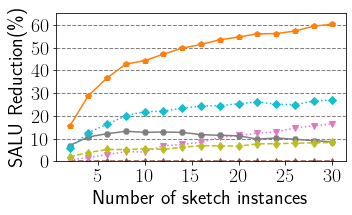

<Figure size 432x288 with 0 Axes>

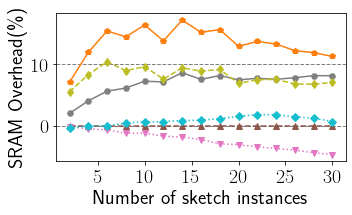

<Figure size 432x288 with 0 Axes>

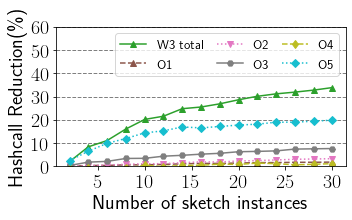

<Figure size 432x288 with 0 Axes>

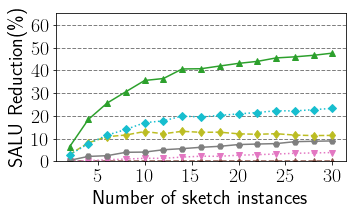

<Figure size 432x288 with 0 Axes>

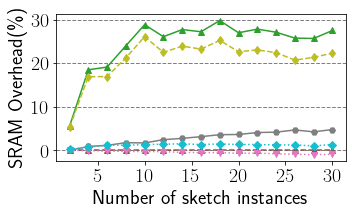

<Figure size 432x288 with 0 Axes>

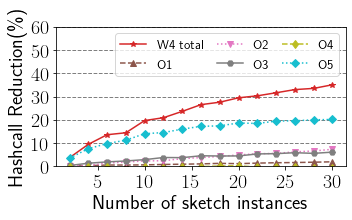

<Figure size 432x288 with 0 Axes>

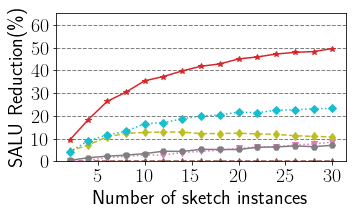

<Figure size 432x288 with 0 Axes>

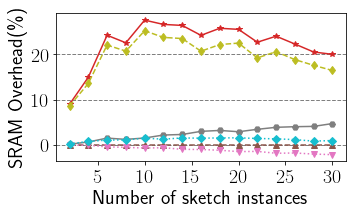

<Figure size 432x288 with 0 Axes>

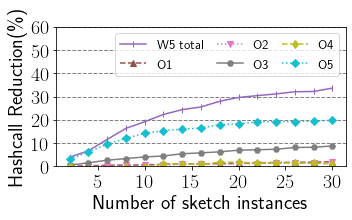

<Figure size 432x288 with 0 Axes>

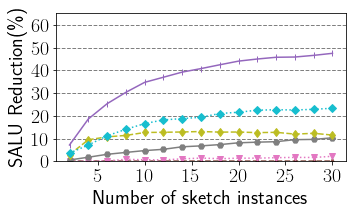

<Figure size 432x288 with 0 Axes>

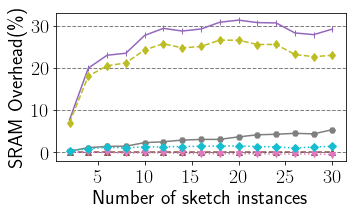

<Figure size 432x288 with 0 Axes>

In [3]:
def get_reduction_rate(baseline, opt):
    return (baseline - opt)/(baseline+0.000001) * 100

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'


for run_name in ["gd_5_5"]:
    print(run_name)
    for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
        key_list = sorted(data[workload][run_name].keys())
        for resource in ["hashcall", "salu", "sram"]:
            fig, ax = plt.subplots(figsize=(5, 3))
            plot_data = {}
            for opt in ["Total", "O1", "O2", "O3", "O4", "O5"]:
                plot_data[opt] = []

            for key in key_list:
                df = data[workload][run_name][key]["avg_resource"]
                total = 0
                for opt in ["O1", "O2", "O3", "O4", "O5"]:
                    series = df[opt]/df["before"]*100
                    if resource == "sram":
                        plot_data[opt].append(-series[resource])
                    else:
                        plot_data[opt].append(series[resource])
                    total += series[resource]
                if resource == "sram":
                    plot_data["Total"].append(-total)
                else:
                    plot_data["Total"].append(total)

            if workload == "workload_1":
                workload_name = "W1"
            if workload == "workload_2":
                workload_name = "W2"
            if workload == "workload_3":
                workload_name = "W3"
            if workload == "workload_4":
                workload_name = "W4"
            if workload == "workload_5":
                workload_name = "W5"
            
            for opt in ["Total", "O1", "O2", "O3", "O4", "O5"]:
                label = opt
                linestyle = "-"
                if opt == "Total":
                    if workload == "workload_1":
                        color="C0"
                        marker = markerst1
                        label = "W1 total"
                    if workload == "workload_2":
                        color="C1"
                        marker = markerst2
                        label = "W2 total"
                    if workload == "workload_3":
                        color="C2"
                        marker = markerst3
                        label = "W3 total"
                    if workload == "workload_4":
                        color="C3"
                        marker = markerst4
                        label = "W4 total"
                    if workload == "workload_5":
                        color="C4"
                        marker = markerst5
                        label = "W5 total"
                if opt == "O1":
                    color = "black"
                    color = "C5"
                    marker = markerst1
                    marker = "^"
                    linestyle = "--"
                if opt == "O2":
                    color = "black"
                    color = "C6"
                    marker = markerst1
                    marker = "v"
                    linestyle = ":"
                if opt == "O3":
                    color = "black"
                    color = "C7"
                    marker = markerst1
                    marker = "H"
                    linestyle = "-"
                if opt == "O4":
                    color = "black"
                    color = "C8"
                    marker = markerst1
                    marker = "d"
                    linestyle = "--"
                if opt == "O5":
                    color = "black"
                    color = "C9"
                    marker = markerst1
                    marker = "D"
                    linestyle = ":"
    
                ax.plot(key_list, plot_data[opt], label=label, color=color, marker=marker, linestyle=linestyle)

            ax.tick_params(axis='y', labelsize=20)
        #     ax.set_xticks(key_list)
        #     ax.set_xticklabels([10, 20, 30], fontsize=20)
        #     ax.set_xticklabels(fontsize=20)
        #     ax.xaxis.label.set_size(20)
#             plt.xlabel('xlabel', fontsize=18)
            ax.set_xlabel('Number of sketch instances', fontsize=20)
            plt.xticks(fontsize=20)
            if resource == "hashcall":
                ax.set_ylim([0, 60])
                ax.set_ylabel(f"Hashcall Reduction(\\%)", fontsize=20)
#                 filename = "hashcall_reduction.pdf"
#         #         plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)
                plt.legend(loc="upper right", fontsize=13, ncol=3, columnspacing=1)

            if resource == "salu":
                ax.set_ylim([0, 65])
                ax.set_ylabel(f"SALU Reduction(\\%)", fontsize=20)
#                 filename = "salu_reduction.pdf"
#                 plt.legend(loc="lower right", fontsize=13, ncol=3, columnspacing=1)

            if resource == "sram":
#                 ax.set_ylim([0, 60])
                ax.set_ylabel(f"SRAM Overhead(\\%)", fontsize=20)
#                 filename = "sram_overhead.pdf"

            from matplotlib.ticker import MultipleLocator
            ax.yaxis.set_major_locator(MultipleLocator(10))

            plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
            fig.tight_layout()
            filename = f"{workload_name}_{resource}.pdf"
            plt.savefig(filename)
            plt.show()
            plt.clf()

